In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [5]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.isnull().sum().sum()

0

In [11]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [12]:
df.sample(3)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
385,Prof,A,15,9,Male,114330
383,Prof,A,44,44,Male,105000
227,AssocProf,A,9,7,Male,70000


In [6]:
import seaborn as sns

<AxesSubplot:xlabel='rank', ylabel='salary'>

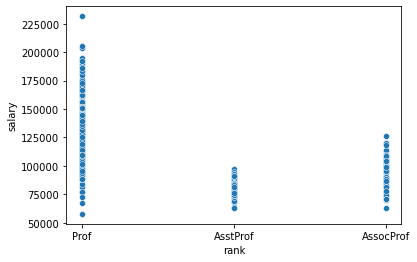

In [14]:
sns.scatterplot(x="rank",y="salary",data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

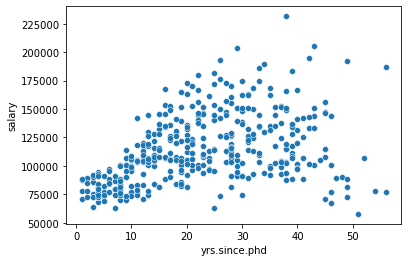

In [17]:
sns.scatterplot(x="yrs.since.phd",y="salary",data=df)

In [7]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [8]:
df['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [9]:
df['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
df["rank"]=le.fit_transform(df["rank"])

In [16]:
df["sex"]=le.fit_transform(df["sex"])

In [17]:
df['rank'].value_counts()

2    266
1     67
0     64
Name: rank, dtype: int64

In [18]:
df['sex'].value_counts()

1    358
0     39
Name: sex, dtype: int64

In [19]:
df.corr()

,rank,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,0.525500,0.447499,0.132492,0.522207
yrs.since.phd,0.525500,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.419231,0.334745,0.138610,1.000000


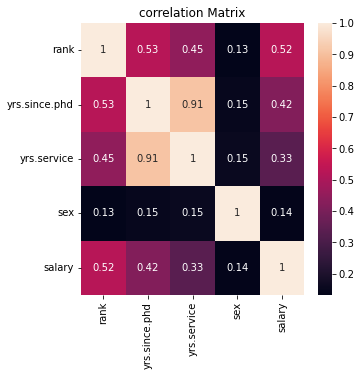

In [28]:
 import matplotlib. pyplot as plt
corr_mat=df.corr()
plt.figure(figsize=[5,5])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

In [30]:
corr_matrix=df.corr()
corr_matrix["salary"].sort_values(ascending=False)


salary           1.000000
rank             0.522207
yrs.since.phd    0.419231
yrs.service      0.334745
sex              0.138610
Name: salary, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

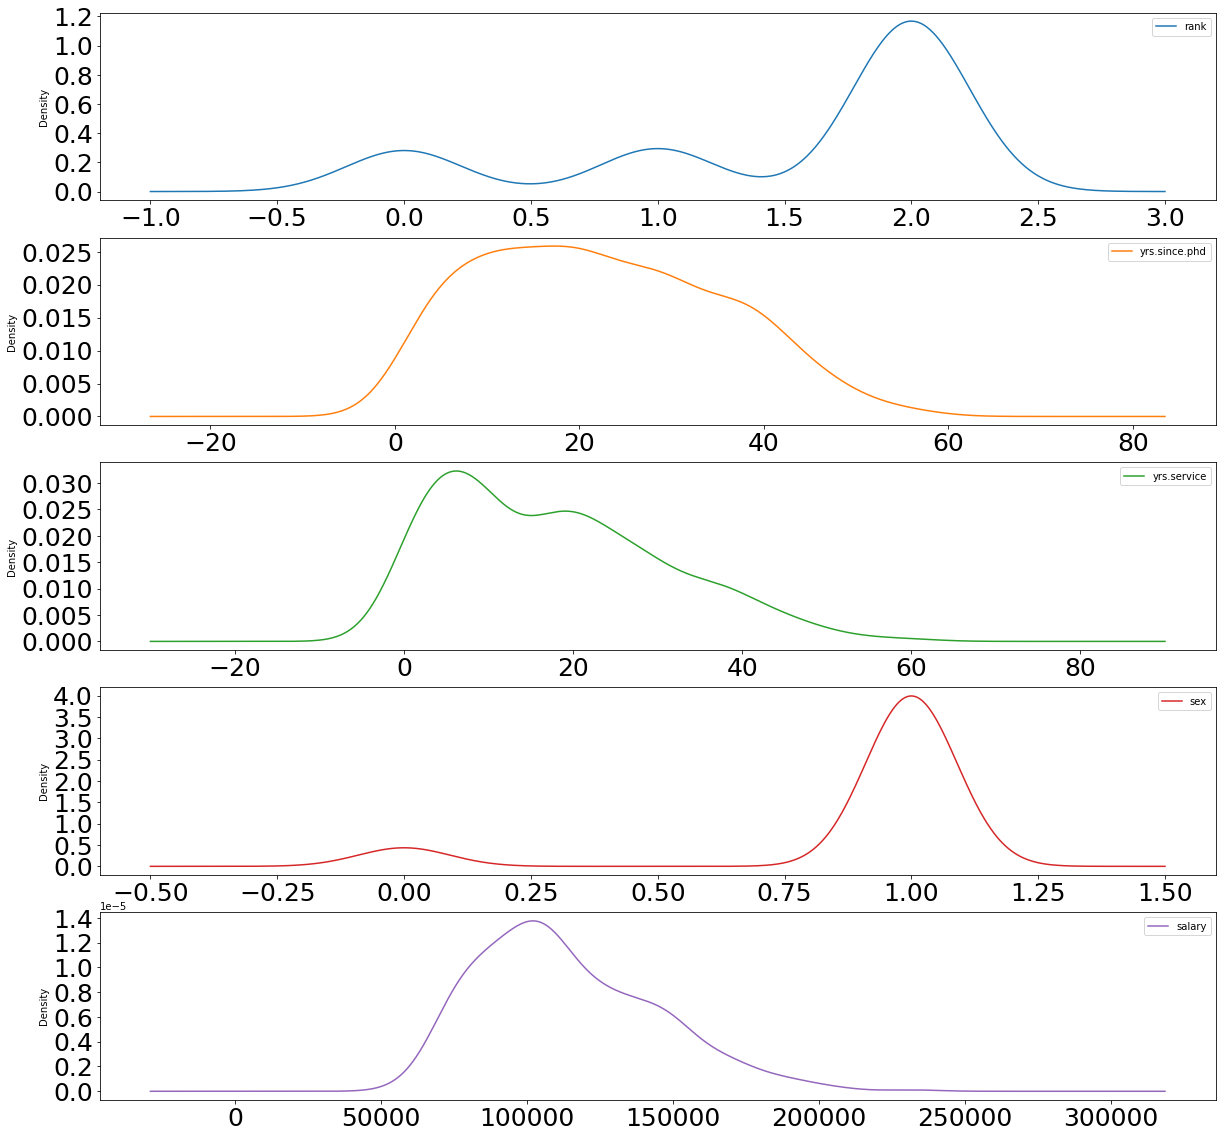

In [42]:
df.plot(kind="density", subplots=True, layout=(5,1), sharex=False, legend=True, fontsize=25, figsize=(20,20))
plt.show

In [62]:
x=df.drop("salary",axis=1)
y=df["salary"]

In [63]:
x

,rank,yrs.since.phd,yrs.service
0,2,19,18
1,2,20,16
2,1,4,3
3,2,45,39
4,2,40,41
...,...,...,...
392,2,33,30
393,2,31,19
394,2,42,25
395,2,25,15


In [64]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [46]:
df["discipline"]=le.fit_transform(df["discipline"])

In [47]:
df['discipline'].value_counts()

1    216
0    181
Name: discipline, dtype: int64

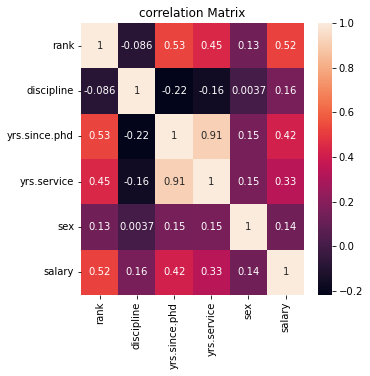

In [48]:
corr_mat=df.corr()
plt.figure(figsize=[5,5])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

In [53]:
df.drop(['sex'], axis=1, inplace=True)

In [54]:
df.drop(['discipline'], axis=1, inplace=True)

In [55]:
df

,rank,yrs.since.phd,yrs.service,salary
0,2,19,18,139750
1,2,20,16,173200
2,1,4,3,79750
3,2,45,39,115000
4,2,40,41,141500
...,...,...,...,...
392,2,33,30,103106
393,2,31,19,150564
394,2,42,25,101738
395,2,25,15,95329


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import warnings
warnings.filterwarnings("ignore")

In [78]:
maxaccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.20, random_state=i)
    LR.fit(x_train, y_train)
    predrf= LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
        print('max_accuracy', maxaccu, 'max')

ValueError: Found input variables with inconsistent numbers of samples: [397, 317]

In [74]:
x

,rank,yrs.since.phd,yrs.service
0,2,19,18
1,2,20,16
2,1,4,3
3,2,45,39
4,2,40,41
...,...,...,...
392,2,33,30
393,2,31,19
394,2,42,25
395,2,25,15


In [77]:
y

298     72300
13      78000
376     74856
61      75243
346    142023
        ...  
203    152500
255     83000
72     100131
235     81700
37      86373
Name: salary, Length: 317, dtype: int64

In [79]:
df

,rank,yrs.since.phd,yrs.service,salary
0,2,19,18,139750
1,2,20,16,173200
2,1,4,3,79750
3,2,45,39,115000
4,2,40,41,141500
...,...,...,...,...
392,2,33,30,103106
393,2,31,19,150564
394,2,42,25,101738
395,2,25,15,95329


In [80]:
x=df.drop("salary",axis=1)
y=df["salary"]

In [81]:
x

,rank,yrs.since.phd,yrs.service
0,2,19,18
1,2,20,16
2,1,4,3
3,2,45,39
4,2,40,41
...,...,...,...
392,2,33,30
393,2,31,19
394,2,42,25
395,2,25,15


In [82]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [89]:
maxaccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.20, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train, y_train)
    predrf= LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
        print('max_accuracy', maxaccu, 'max')

accuracy 0.025 random_state 1
max_accuracy 0.025 max
accuracy 0.0125 random_state 2
accuracy 0.0375 random_state 3
max_accuracy 0.0375 max
accuracy 0.025 random_state 4
accuracy 0.0 random_state 5
accuracy 0.025 random_state 6
accuracy 0.0 random_state 7
accuracy 0.0 random_state 8
accuracy 0.0125 random_state 9
accuracy 0.0 random_state 10
accuracy 0.0 random_state 11
accuracy 0.0125 random_state 12
accuracy 0.05 random_state 13
max_accuracy 0.05 max
accuracy 0.0125 random_state 14
accuracy 0.0 random_state 15
accuracy 0.0125 random_state 16
accuracy 0.0125 random_state 17
accuracy 0.025 random_state 18
accuracy 0.025 random_state 19
accuracy 0.0125 random_state 20
accuracy 0.0125 random_state 21
accuracy 0.025 random_state 22
accuracy 0.0 random_state 23
accuracy 0.0125 random_state 24
accuracy 0.0125 random_state 25
accuracy 0.0125 random_state 26
accuracy 0.0 random_state 27
accuracy 0.0 random_state 28
accuracy 0.0 random_state 29
accuracy 0.0125 random_state 30
accuracy 0.0 rando

In [90]:
print("best accuracy is", maxaccu, " on random state", maxRS)

best accuracy is 0.05  on random state 13


In [91]:
LR.fit(x_train, y_train)

LogisticRegression()

In [93]:
predlr= LR.predict(x_test)
print("accuracy", accuracy_score(y_test, predlr)*100)
#print(confusion_matrix(y_test,predlr))
#print(classification_report(y_test, predlr))

accuracy 1.25
